In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
from collections import defaultdict
import string

### Train data and test data overview

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (1306122, 3)
Test Shape: (56370, 2)


#### Target Distribution in train data

In [5]:
target_counts = train.target.value_counts()
target_counts

0    1225312
1      80810
Name: target, dtype: int64

In [6]:
print('sincere questions: {}%'. format(((target_counts[0]*100)/train.shape[0]).round(2)))
print('insincere questions: {}%'. format(((target_counts[1]*100)/train.shape[0]).round(2)))

sincere questions: 93.81%
insincere questions: 6.19%


#### We can see that the the train data is highly biased.

### Most frequent words(Unigram and Bigram) for sinsere and insinsere question

In [74]:
train1 = train[train.target == 1]
train0 = train[train.target == 0]

In [77]:
# custom function for ngram generation #
def generate_ngrams(text, n_gram=1):
    STOPWORDS = stopwords.words('english')
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [78]:
# Get the word count from sincere questions-Unigram #
freq_dict = defaultdict(int)
for sent in train0['question_text']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ['word', 'wordcount']

In [38]:
fd_sorted.head(20)

,word,wordcount
0,best,60816
1,get,58731
2,would,57105
3,people,37960
4,like,37618
5,good,34827
6,one,28840
7,make,25696
8,think,21641
9,many,20788


In [39]:
# Get the word count from insincere questions-Unigram #
freq_dict = defaultdict(int)
for sent in train1["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

In [40]:
fd_sorted.head(20)

,word,wordcount
0,people,11036
1,like,5708
2,trump,4893
3,women,4757
4,would,4126
5,think,3774
6,many,3552
7,white,3351
8,get,3177
9,men,3152


In [42]:
# Get the word count from sincere questions - Bigram #
freq_dict = defaultdict(int)
for sent in train0["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted.head(20)

,word,wordcount
0,best way,6973
1,would happen,3350
2,year old,2972
3,get rid,2317
4,feel like,2274
5,what's best,2196
6,many people,1931
7,would like,1922
8,computer science,1870
9,even though,1859


In [44]:
# Get the word count from insincere questions - Bigram #
freq_dict = defaultdict(int)
for sent in train1["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted.head(20)

,word,wordcount
0,donald trump,1076
1,white people,673
2,black people,652
3,many people,383
4,united states,360
5,even though,335
6,trump supporters,335
7,year old,330
8,president trump,328
9,hillary clinton,305


#### Note: Visualize them

### Meta Features

In [13]:
def meta_features():
    #number of words
    train['num_words'] = train['question_text'].apply(lambda x: len(str(x).split()))
    test['num_words'] = test['question_text'].apply(lambda x: len(str(x).split()))
    
    #number of unique words
    train['num_unique_words'] = train['question_text'].apply(lambda x: len(set(str(x).split())))
    test['num_unique_words'] = test['question_text'].apply(lambda x: len(set(str(x).split())))
    
    #number of characters
    train['num_chars'] = train['question_text'].apply(lambda x: len(str(x)))
    test['num_chars'] = test['question_text'].apply(lambda x: len(str(x)))
    
    #number of stopwords
    eng_stopwords = set(stopwords.words('english'))
    train['num_stopwords'] = train['question_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    test['num_stopwords'] = test['question_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    
    #number of punctuations
    train['num_punctuations'] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
    test['num_punctuations'] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
    
    #number of upper words
    train['num_words_upper'] = train['question_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    test['num_words_upper'] = test['question_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    
    #number of title case words
    train['num_words_title'] = train['question_text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    test['num_words_title'] = test['question_text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    
    #percentage of stopwords
    train['stopwords_per'] = (train['num_stopwords']/train['num_words']).round(2)
    
    return train, test

In [14]:
meta_features()
train.head()

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,stopwords_per
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,7,1,0,2,0.54
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,9,2,0,1,0.56
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,3,2,0,2,0.30
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,3,1,0,4,0.33
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,8,1,2,3,0.53


In [57]:
train['num_words'].loc[train['num_words']>60] = 60
train['num_chars'].loc[train['num_chars']>350] = 350

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Number of characters in each class')

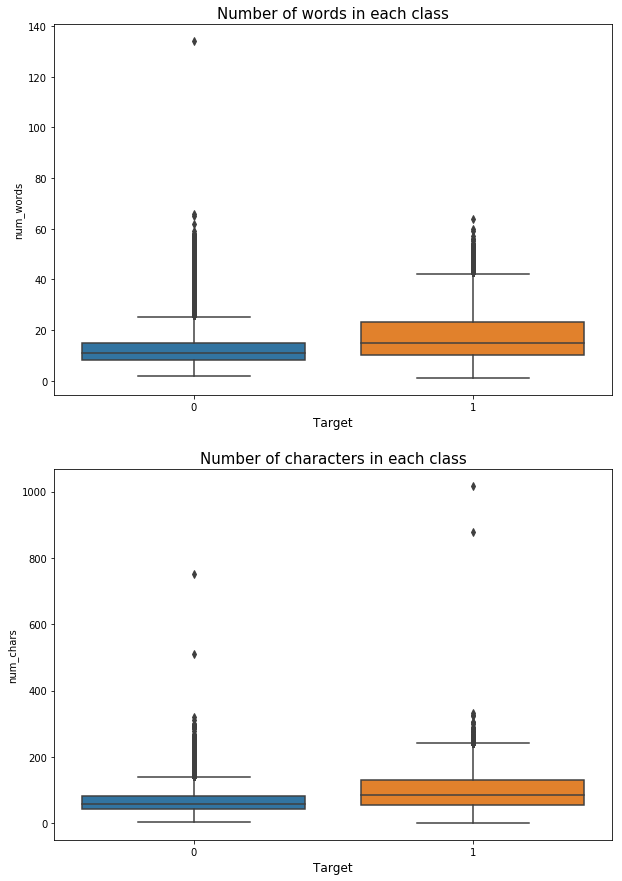

In [29]:
f, axes = plt.subplots(2, 1, figsize=(10,15))
sns.boxplot(x='target', y='num_words', data=train, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='target', y='num_chars', data=train, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

#### Looks like insinsere data has more number of words and characters, which can be used as features.

### Compare train data and test data

In [65]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [66]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [67]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 70.


###  Outliers

In [17]:
train_short = train[train['question_text'].str.len()<10]
train_short

,qid,question_text,target
61968,0c2a113858db20e0a4db,Quora:,1
78445,0f5a41d6752d5d667895,Is,1
126166,18b058d2aabadb23c12d,In Islam?,0
155026,1e52e57a821c597eee0c,Dowry:,1
230024,2cfd7dec2231e47afd6c,I 12?,0
299304,3a9ae962f1094242e36f,If,1
356798,45efae151057c2c0e49c,To Quora:,1
365554,47a9d1050da758790165,Sexism:,1
367936,48206e5f0dcedf1f00e6,Hungary:,1
369692,487b60d30e36c86d350d,History:,1


In [18]:
train_long = train[train['question_text'].str.len()>300]
train_long.head(10)

,qid,question_text,target
163583,1ffca149bd0a19cd714c,What is [math]\overbrace{\sum_{\vartheta=8}^{\...,1
165040,2041ae71c5a8c0cba026,"To you, does being a Christian mean inviting ...",1
315732,3de13bd2110379eada25,"[math]\frac{\text{d}x}{\text{d}t}=Ax , {\text{...",1
327381,402ce4678756ee1c6f4a,Which of the options listed below would most a...,1
341312,42dc38e62f0bdebfa6b6,What is the answer to [math]\frac{422}{2262\mi...,0
393959,4d2e2796dd1ced2c8e64,What are the prospects for International Stude...,0
443216,56da6b6875d686b48fde,What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan...,1
464397,5aee8de933284e662f15,Let [math]f:\mathbb{R} \rightarrow \mathbb{R}[...,0
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0
1215721,ee431b31ca30ebbbc256,How do you show that [math]\displaystyle\sum_{...,1


####  Looks like there are some short meaningless questions in the train data that need to be removed. 